### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

### Import Dataset

In [2]:
df = pd.read_csv("Sport car price.csv")
df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


# DATA UNDERSTANDING OR DATA PREPROCESSIG

#### #Top 3 Rows

In [3]:
df.head(3)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"


#### #Find Shape

In [4]:
df.shape

(1007, 8)

#### #Find Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


#### #Changing Data Types

In [6]:
# Remove comma from Price column
df["Price (in USD)"] = df["Price (in USD)"].str.replace(",","")
# Convert the Price column to integer
df["Price (in USD)"] =df["Price (in USD)"].apply(int)

In [7]:
# Change data into float
df["0-60 MPH Time (seconds)"] = df["0-60 MPH Time (seconds)"].str.replace("<","")
df["0-60 MPH Time (seconds)"] = df["0-60 MPH Time (seconds)"].apply(float)

In [8]:
# Convert data into integer
df["Torque (lb-ft)"] = df["Torque (lb-ft)"].str.replace(",","").str.replace("+","")
df["Torque (lb-ft)"] = df["Torque (lb-ft)"].str.replace("-","0")
df["Torque (lb-ft)"] = df["Torque (lb-ft)"].fillna("0")
df["Torque (lb-ft)"] = df["Torque (lb-ft)"].apply(int)

C:\Users\varsh\AppData\Local\Temp\ipykernel_27044\2614027451.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Torque (lb-ft)"] = df["Torque (lb-ft)"].str.replace(",","").str.replace("+","")


In [9]:
# Convert data into integer
df["Horsepower"] = df["Horsepower"].str.replace("+","").str.replace(",","")
df["Horsepower"] = df["Horsepower"].apply(int)

C:\Users\varsh\AppData\Local\Temp\ipykernel_27044\1588016146.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Horsepower"] = df["Horsepower"].str.replace("+","").str.replace(",","")


#### #Segment Engine Size

In [10]:
df["Engine Size (L)"].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', nan, '6.6', '7', '1.7',
       '3.3', '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

In [11]:
# Define a function to segment the values
def segment_engine_size(engine_size):
    if engine_size in ['Electric','Hybrid']:
        return 'Electric/Hybrid'
    elif engine_size in ['Electric (93 kWh)', 'Electric (100 kWh)','Electric (tri-motor)','Electric Motor','2.0 (Electric)']:
        return 'Electric'
    elif engine_size == '1.5 + Electric':
        return '1.5 Hybrid'
    elif engine_size in ['Hybrid (4.0)','4.0 (Hybrid)']:
        return '4.0 Hybrid'
    elif engine_size == '0':
        return 'Unknown'
    elif engine_size == '-':
        return 'Unknown'
    elif float(engine_size) < 2:
        return 'Small'
    elif float(engine_size) < 3:
        return 'Medium'
    else:
        return'Large'

# Apply the function to the engine size column
df["Engine Size (L)"] = df["Engine Size (L)"].apply(segment_engine_size)
df["Engine Size (L)"].unique()

array(['Large', 'Medium', 'Electric/Hybrid', 'Electric', '1.5 Hybrid',
       'Small', 'Unknown', '4.0 Hybrid'], dtype=object)

#### #Distribution of Engine Size Segment

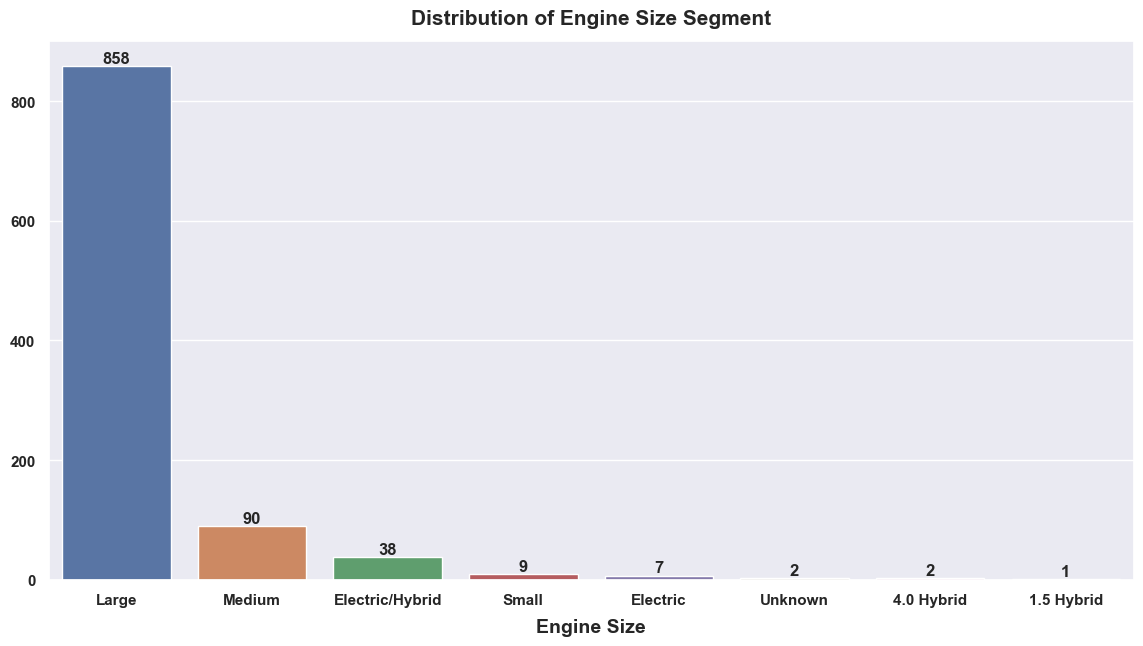

In [12]:
plt.figure(figsize=(14,7))
ax = sns.countplot(data=df,x=df["Engine Size (L)"],order=df["Engine Size (L)"].value_counts().index)
plt.title("Distribution of Engine Size Segment",pad=12,fontsize=15,weight="bold")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.xlabel("Engine Size",weight="bold",fontsize= 14,labelpad=8)
plt.ylabel("")
for i in ax.containers:
    i.datavalues
    ax.bar_label(i,weight="bold")
plt.show()

#### #Find Data Types

In [13]:
# Find data types after changing data types
df.dtypes

Car Make                    object
Car Model                   object
Year                         int64
Engine Size (L)             object
Horsepower                   int64
Torque (lb-ft)               int64
0-60 MPH Time (seconds)    float64
Price (in USD)               int64
dtype: object

#### #Statistical Summary

In [14]:
df.describe()

,Year,Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,2021.201589,657.984111,557.347567,3.513406,3.820359e+05
std,2.019802,593.017842,441.906994,0.777639,7.383227e+05
min,1965.000000,181.000000,0.000000,1.800000,2.500000e+04
25%,2021.000000,454.000000,406.000000,2.900000,7.180000e+04
50%,2021.000000,591.000000,509.000000,3.500000,1.400000e+05
75%,2022.000000,708.500000,604.000000,4.000000,2.500000e+05
max,2023.000000,10000.000000,10000.000000,6.500000,5.200000e+06


In [15]:
df.describe(include=object)

,Car Make,Car Model,Engine Size (L)
count,1007,1007,1007
unique,38,176,8
top,Porsche,GT,Large
freq,88,55,858


#### #Find Duplicate Values

In [16]:
df.loc[df.duplicated().sum()]

Car Make                    Chevrolet
Car Model                  Camaro ZL1
Year                             2022
Engine Size (L)                 Large
Horsepower                        650
Torque (lb-ft)                    650
0-60 MPH Time (seconds)           3.5
Price (in USD)                  69000
Name: 293, dtype: object

#### #Find Null values

In [17]:
df.isna().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

#### #Remove Car Model Column Because Its Irrelevant And Have Alot Of Unique Values

In [18]:
df["Car Model"].value_counts()

GT                  55
Camaro ZL1          30
Evora GT            27
Continental GT      24
LC 500              24
                    ..
Fenyr SuperSport     1
Panamera Turbo       1
Atom                 1
AMG C 63 S           1
Mustang              1
Name: Car Model, Length: 176, dtype: int64

In [19]:
df.drop(columns= "Car Model",inplace=True)
df.head(3)

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,2022,Large,379,331,4.0,101200
1,Lamborghini,2021,Large,630,443,2.8,274390
2,Ferrari,2022,Large,661,561,3.0,333750


#### #Segment Car Make

In [20]:
df["Car Make"].unique()

array(['Porsche', 'Lamborghini', 'Ferrari', 'Audi', 'McLaren', 'BMW',
       'Mercedes-Benz', 'Chevrolet', 'Ford', 'Nissan', 'Aston Martin',
       'Bugatti', 'Dodge', 'Jaguar', 'Koenigsegg', 'Lexus', 'Lotus',
       'Maserati', 'Alfa Romeo', 'Ariel', 'Bentley', 'Mercedes-AMG',
       'Pagani', 'Polestar', 'Rimac', 'Acura', 'Mazda', 'Rolls-Royce',
       'Tesla', 'Toyota', 'W Motors', 'Shelby', 'TVR', 'Subaru',
       'Pininfarina', 'Kia', 'Alpine', 'Ultima'], dtype=object)

In [21]:
# Define a function to segment the values
def segment_car_make(car_make):
    if car_make  in ['Porsche', 'Lamborghini', 'Ferrari','McLaren','Aston Martin','Bugatti','Koenigsegg']:
        return 'Luxury'
    elif car_make in ['Audi','BMW','Mercedes-Benz', 'Chevrolet', 'Ford', 'Nissan','Dodge', 'Jaguar','Mercedes-AMG']:
        return 'Mainstream'
    elif car_make in ['Ariel','W Motors', 'Shelby', 'TVR', 'Subaru','Alpine', 'Ultima']:
        return 'Specialty'
    else:
        return 'Other'

# Apply the function to the car make column
df["Car Make"] = df["Car Make"].apply(segment_car_make)
df["Car Make"].unique()

array(['Luxury', 'Mainstream', 'Other', 'Specialty'], dtype=object)

### #Distribution of Cars Segment

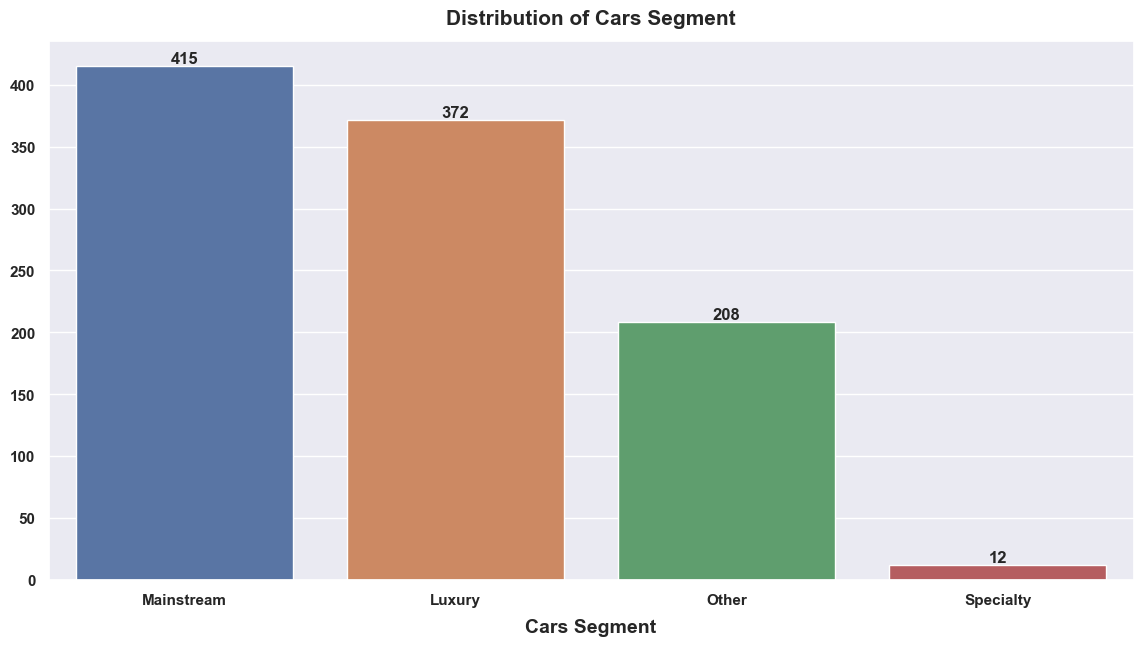

In [22]:
plt.figure(figsize=(14,7))
ax = sns.countplot(data=df,x=df["Car Make"],order=df["Car Make"].value_counts().index)
plt.title("Distribution of Cars Segment",pad=12,fontsize=15,weight="bold")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.xlabel("Cars Segment",weight="bold",fontsize= 14,labelpad=8)
plt.ylabel("")
for i in ax.containers:
    i.datavalues
    ax.bar_label(i,weight="bold")
plt.show()

In [23]:
df.head(5)

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Luxury,2022,Large,379,331,4.0,101200
1,Luxury,2021,Large,630,443,2.8,274390
2,Luxury,2022,Large,661,561,3.0,333750
3,Mainstream,2022,Large,562,406,3.2,142700
4,Luxury,2021,Large,710,568,2.7,298000


### #Distribution Of Cars Category In Price

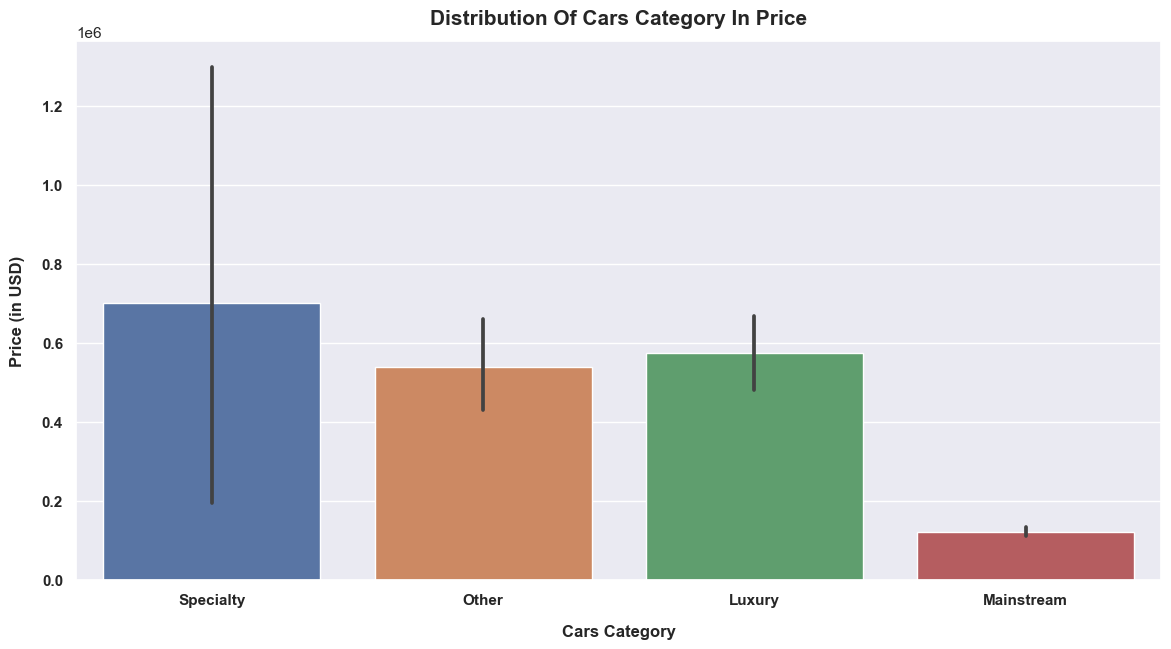

In [24]:
plt.figure(figsize=(14,7))
sns.barplot(data=df,x=df["Car Make"],y=df["Price (in USD)"], order=df["Car Make"].value_counts(ascending=True).index)
plt.title("Distribution Of Cars Category In Price",fontsize=15,weight="bold",pad=12)
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.xlabel("Cars Category",weight="bold",fontsize=12,labelpad=12)
plt.ylabel("Price (in USD)",weight="bold",fontsize=12,labelpad=12)
plt.show()

### #Distribution Of Engine Size In Price

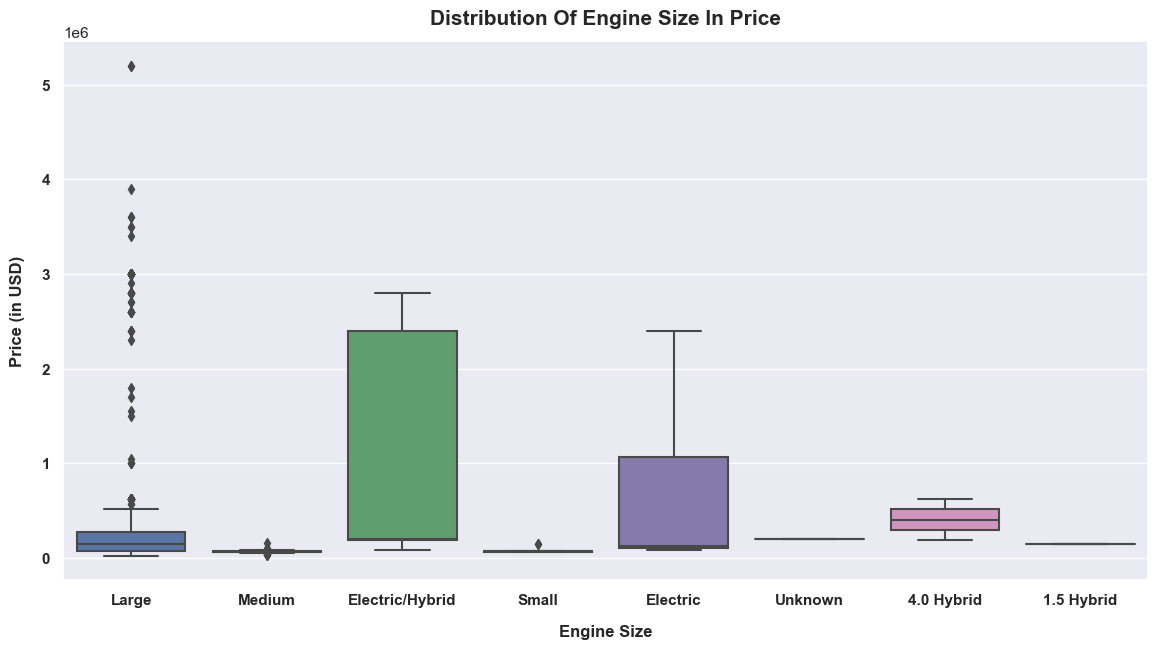

In [25]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df,x=df["Engine Size (L)"],y=df["Price (in USD)"],order=df["Engine Size (L)"].value_counts().index)
plt.title("Distribution Of Engine Size In Price",fontsize=15,weight="bold",pad=12)
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.xlabel("Engine Size",weight="bold",fontsize=12,labelpad=12)
plt.ylabel("Price (in USD)",weight="bold",fontsize=12,labelpad=12)
plt.show()